# Build model


In [209]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Splitting data into training set and testing set

In [210]:
weights=0.7
bias=0.3

X=torch.arange(0,1,0.02).unsqueeze(dim=1)
Y=weights*X+bias
print(X,Y)

train_split=int(0.8*len(X))
X_train, Y_train=X[:train_split], Y[:train_split]
X_test, Y_test=X[train_split:], Y[train_split:]
len(X_train), len(Y_train ),len(X_test) , len(Y_test)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [

(40, 40, 10, 10)

# Visualization

In [211]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  # Show the legend
  plt.legend(prop={"size": 14})

# Linear Regression Model with random weights

In [212]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, 
                                            requires_grad=True,
                                            dtype=torch.float)) 
    
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [213]:
#torch.manual_seed(42)
model0=LinearRegressionModel()
print(list(model0.parameters()))
model0.state_dict()

[Parameter containing:
tensor([0.5227], requires_grad=True), Parameter containing:
tensor([-0.2384], requires_grad=True)]


OrderedDict([('weights', tensor([0.5227])), ('bias', tensor([-0.2384]))])

In [214]:
with torch.inference_mode():
  ypreds=model0(X_test)
print(ypreds)
print(Y_test)

tensor([[0.1798],
        [0.1903],
        [0.2007],
        [0.2112],
        [0.2216],
        [0.2321],
        [0.2425],
        [0.2530],
        [0.2635],
        [0.2739]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


# Visualizing the error

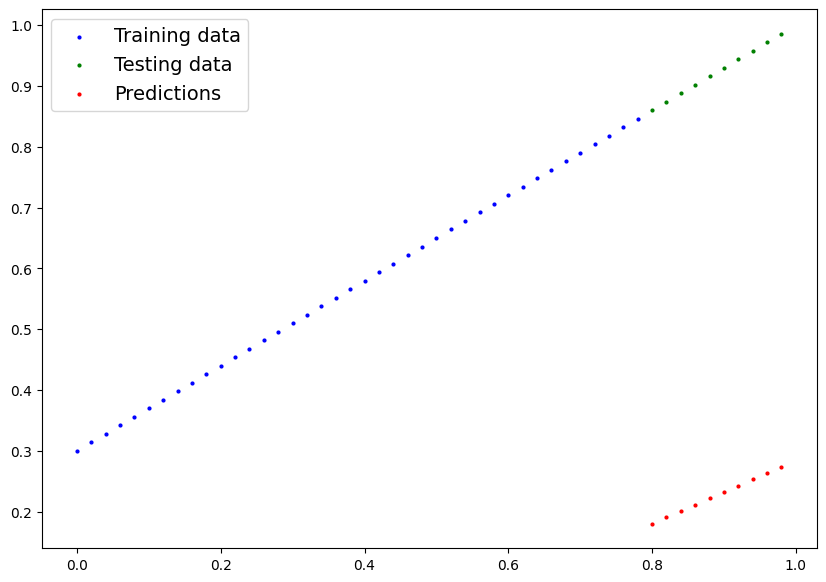

In [215]:
plot_predictions(predictions=ypreds)

# Loss Function , Optimizer and Training

In [216]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.Adam(model0.parameters(),lr=0.001)  
epochs=10000
losses=[]
for i in range(epochs):
  ypreds=model0(X_train)
  loss=loss_fn(ypreds,Y_train)
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if i%1000==0:
    print(f"Epoch {i} loss: {loss}")
print(f"Final loss: {loss}")

Epoch 0 loss: 0.6074975728988647
Epoch 1000 loss: 0.00036136285052634776
Epoch 2000 loss: 0.00012462139420676976
Epoch 3000 loss: 0.00011922046542167664
Epoch 4000 loss: 0.00011773481674026698
Epoch 5000 loss: 0.0001172401025542058
Epoch 6000 loss: 0.00011710375838447362
Epoch 7000 loss: 0.00011698901653289795
Epoch 8000 loss: 0.00011698901653289795
Epoch 9000 loss: 0.00011698901653289795
Final loss: 2.8939544790773652e-05


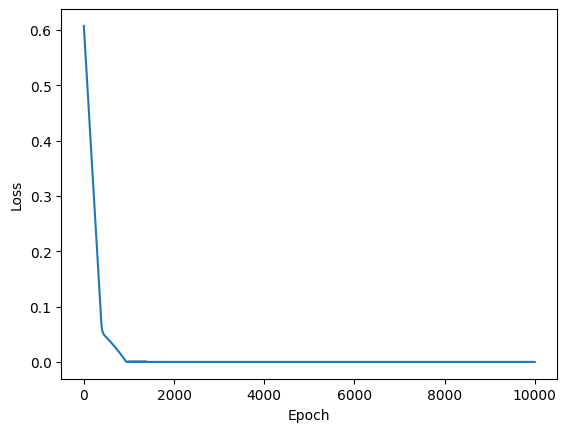

In [217]:
#Loss vs Epoch curve
losses=[loss.item() for loss in losses]
plt.plot(range(epochs),losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [218]:
with torch.inference_mode():
  ypreds=model0(X_test)
print(ypreds)
print(Y_test)

tensor([[0.8599],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9158],
        [0.9298],
        [0.9438],
        [0.9578],
        [0.9718],
        [0.9858]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


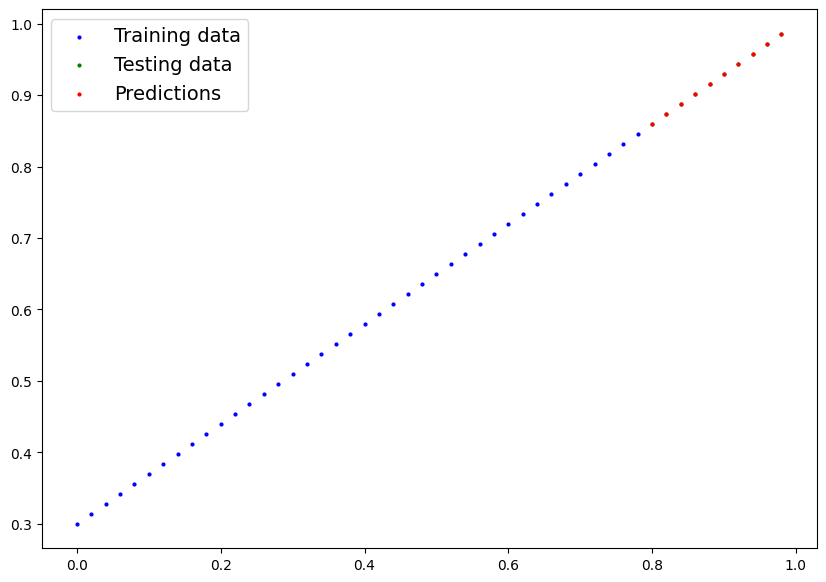

In [219]:
plot_predictions(predictions=ypreds)

In [220]:

def mae(y_true:torch.Tensor, y_pred:torch.Tensor):
  return torch.mean(torch.abs(y_true-y_pred))

def mse(y_true:torch.Tensor, y_pred:torch.Tensor):
    return torch.mean((y_true-y_pred)**2)

def rmse(y_true:torch.Tensor, y_pred:torch.Tensor):
    return torch.sqrt(mse(y_true,y_pred))

def r2(y_true:torch.Tensor, y_pred:torch.Tensor):
    return 1-(torch.sum((y_true-y_pred)**2)/torch.sum((y_true-torch.mean(y_true))**2))

print(f"MAE: {mae(Y_test,ypreds)}")
print(f"MSE: {mse(Y_test,ypreds)}")
print(f"RMSE: {rmse(Y_test,ypreds)}")
print(f"R2: {r2(Y_test,ypreds)}")
print(model0.state_dict())


MAE: 0.00015466213517356664
MSE: 2.3939094262459548e-08
RMSE: 0.0001547226420370862
R2: 0.9999852180480957
OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.2999]))])


# Saving the Model

In [221]:
#save model
from pathlib import Path
model_path = Path('models')
model_path.mkdir(parents=True,exist_ok=True)
model_name="linear.pth"
model_save_path = model_path/model_name
torch.save(model0.state_dict(),model_save_path)

# Loading the model

In [222]:
loaded=LinearRegressionModel()
loaded.load_state_dict(torch.load(model_save_path))
loaded.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.2999]))])